In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency as chi

In [244]:
df=pd.read_csv("Titanic_ISTE.csv",na_values='NaN')
df=df.drop(columns=list(df.iloc[:,12:].columns)+['Cabin'])
df#the columns dropped had no data`

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,S
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,S
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,S
889,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C


In [245]:
df["Age"] = df["Age"].replace(np.NaN, df["Age"].mean())
df.loc[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     889 non-null    float64
 2   Pclass       890 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        890 non-null    float64
 7   Parch        889 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 76.7+ KB


In [247]:
pip install missingno

<AxesSubplot:>

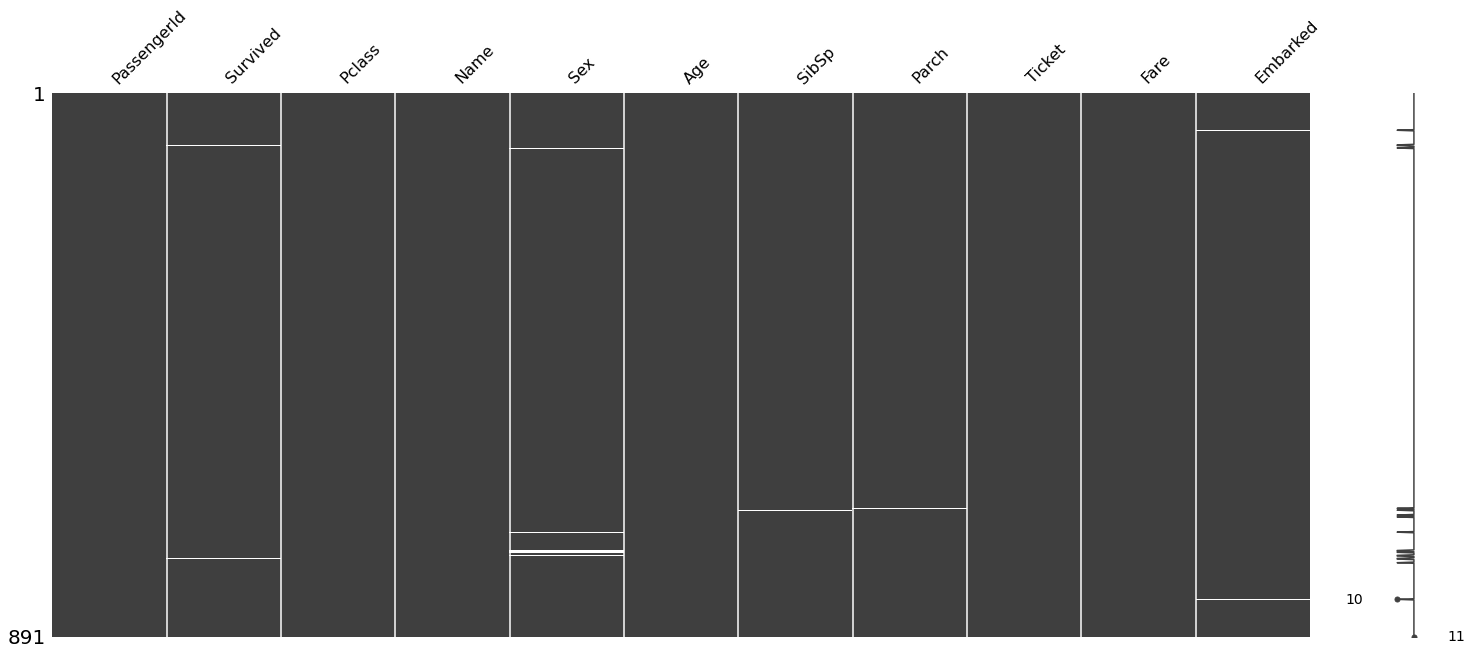

In [248]:
import missingno as missing
missing.matrix(df)

In [249]:
df.loc[df['Sex']=='male','Sex']=0
df.loc[df['Sex']=='female','Sex']=1
df['Sex'].value_counts()

0    569
1    312
Name: Sex, dtype: int64

In [250]:
print(df.loc[df['Sex']==0]['Fare'].median(),df.loc[df['Sex']==1]['Fare'].median(),df['Fare'].median())
#so fare for feamle is higher than usual meadian and the opposite for males. Mediian here makes more sense for discrete points or something. So, mean is considered.

11.1333 23.0 14.4542


In [251]:
for i in range(890):
    if(not(df.iloc[i,4]==0 or df.iloc[i,4]==1) and (df.iloc[i,-2]>14.45)):
        df.iloc[i,4]=1
    elif not(df.iloc[i,4]==0 or df.iloc[i,4]==1):
        df.iloc[i,4]=0

In [252]:
df['Sex'].value_counts()

0    575
1    316
Name: Sex, dtype: int64

In [253]:
prev_male=569
prev_female=312
new_male=575
new_female=316
print("New ratio: ",new_male/new_female)
print("Prev ratio: ",prev_male/prev_female)
print("Added ratio: ",6/4)

New ratio:  1.8196202531645569
Prev ratio:  1.8237179487179487
Added ratio:  1.5


##### the ratio has remained same so umm the approximation is farely right

In [254]:
df['Pclass'].value_counts()

3.0    490
1.0    216
2.0    184
Name: Pclass, dtype: int64

In [255]:
df["Pclass"] = df["Pclass"].replace(np.NaN, df["Pclass"].mode()[0])#most occurin discrete value

In [256]:
df['SibSp'].value_counts()

0.0    608
1.0    209
2.0     28
4.0     18
3.0     16
8.0      7
5.0      4
Name: SibSp, dtype: int64

In [257]:
df["SibSp"] = df["SibSp"].replace(np.NaN, df["SibSp"].mode()[0])#most occurin discrete value

In [258]:
df['Parch'].value_counts()

0.0    677
1.0    117
2.0     80
3.0      5
5.0      5
4.0      4
6.0      1
Name: Parch, dtype: int64

In [259]:
df["Parch"] = df["Parch"].replace(np.NaN, df["Parch"].mode()[0])#most occurin discrete value

In [260]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [235]:
df["Embarked"] = df["Embarked"].replace(np.NaN, df["Embarked"].mode()[0])#most occurin discrete value

In [261]:
df=df.dropna()

#### Correlation matrix is given beow

In [262]:
df.corr()['Survived']

PassengerId   -0.004807
Survived       1.000000
Pclass        -0.338790
Age           -0.076003
SibSp         -0.033039
Parch          0.082922
Fare           0.256996
Name: Survived, dtype: float64

##### Chi_square test

In [263]:
for i in range(1,11):
    table=pd.crosstab(df['Survived'],df.iloc[:,i])
    print("P-value of chi test for column %s is %.3f"%(df.iloc[:,[2,i]].columns[1],chi(table)[1]) )


P-value of chi test for column Survived is 0.000
P-value of chi test for column Pclass is 0.000
P-value of chi test for column Name is 0.484
P-value of chi test for column Sex is 0.000
P-value of chi test for column Age is 0.034
P-value of chi test for column SibSp is 0.000
P-value of chi test for column Parch is 0.000
P-value of chi test for column Ticket is 0.012
P-value of chi test for column Fare is 0.000
P-value of chi test for column Embarked is 0.000


In [264]:
df.loc[df['Sex']==1,'Sex']='Female'
df.loc[df['Sex']==0,'Sex']='Male'

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [265]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
df.iloc[:, [5,-2]] = norm.fit_transform(df.iloc[:, [5,-2]])


C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [266]:
df.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",Male,0.271174,1.0,0.0,A/5 21171,0.014151,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,0.472229,1.0,0.0,PC 17599,0.139136,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",Female,0.321438,0.0,0.0,STON/O2. 3101282,0.015469,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,0.434531,1.0,0.0,113803,0.103644,S
4,5,0.0,3.0,"Allen, Mr. William Henry",Male,0.434531,0.0,0.0,373450,0.015713,S
...,...,...,...,...,...,...,...,...,...,...,...
882,887,0.0,2.0,"Montvila, Rev. Juozas",Male,0.334004,0.0,0.0,211536,0.025374,S
883,888,1.0,1.0,"Graham, Miss. Margaret Edith",Female,0.233476,0.0,0.0,112053,0.058556,S
884,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",Female,0.367628,1.0,2.0,W./C. 6607,0.045771,S
885,890,1.0,1.0,"Behr, Mr. Karl Howell",Male,0.321438,0.0,0.0,111369,0.058556,C


In [215]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [267]:
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=['Sex','Embarked'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

df_encoded = encoder.fit_transform(df)
df_encoded


C:\Users\LENOVO\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,PassengerId,Survived,Pclass,Name,Sex_Male,Sex_Female,Age,SibSp,Parch,Ticket,Fare,Embarked_S,Embarked_C,Embarked_Q
0,1,0.0,3.0,"Braund, Mr. Owen Harris",1.0,0.0,0.271174,1.0,0.0,A/5 21171,0.014151,1.0,0.0,0.0
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,1.0,0.472229,1.0,0.0,PC 17599,0.139136,0.0,1.0,0.0
2,3,1.0,3.0,"Heikkinen, Miss. Laina",0.0,1.0,0.321438,0.0,0.0,STON/O2. 3101282,0.015469,1.0,0.0,0.0
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1.0,0.434531,1.0,0.0,113803,0.103644,1.0,0.0,0.0
4,5,0.0,3.0,"Allen, Mr. William Henry",1.0,0.0,0.434531,0.0,0.0,373450,0.015713,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",1.0,0.0,0.334004,0.0,0.0,211536,0.025374,1.0,0.0,0.0
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",0.0,1.0,0.233476,0.0,0.0,112053,0.058556,1.0,0.0,0.0
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,1.0,0.367628,1.0,2.0,W./C. 6607,0.045771,1.0,0.0,0.0
889,890,1.0,1.0,"Behr, Mr. Karl Howell",1.0,0.0,0.321438,0.0,0.0,111369,0.058556,0.0,1.0,0.0
